In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

Dice Game: six sides to the dice.
equal probability of outcome for each side. prob = 1/6
we assign different value outcomes to each of each dice we get. 


In [2]:
dice_game = {
    1: 0.5,
    2: 1.05,
    3: 1.05,
    4: 1.05,
    5: 1.05,
    6: 1.5,
}

/home/siddesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


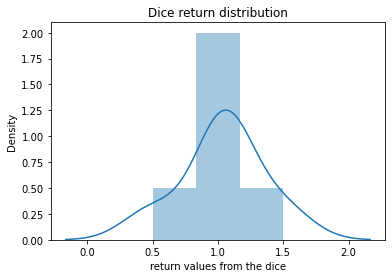

In [3]:
sns.distplot(list(dice_game.values()), bins=3)
plt.title('Dice return distribution')
plt.xlabel('return values from the dice')
plt.show()
# plt.savefig('dice_game-png')

In [4]:
# arithmetic expectation value
np.sum(list(dice_game.values()))/len(dice_game.keys())

1.0333333333333334

In [5]:
value = 1
for i in dice_game.keys():
    value *= dice_game[i]
value

0.9116296875000002

In [6]:
time = 300 # simulates 300 days
no_iterations = 5000 # number of permutations

percentile_95 = int(0.05*no_iterations)
percentile_5 = int(0.95*no_iterations)
percentile_50 = int(no_iterations/2)

In [7]:
res = (np.log(0.5)+np.log(1.05)+np.log(1.05)+np.log(1.05)+np.log(1.05)+np.log(1.5))/6
np.power(np.e, res)

0.9846980471114547

wealth after one round of this game in the path of 1->6 is 0.911. we lost 10% of our wealth

In [8]:

wealth_info = np.ones((no_iterations, 1))*100 # starting wealth 100
bet_values = list(dice_game.values())

for i in range(1, time):
    values = np.random.choice(a=bet_values, size=no_iterations)
    end_wealth = np.multiply(wealth_info[:,-1], values).reshape((-1,1))
    wealth_info = np.concatenate((wealth_info, end_wealth), axis=1)


In [9]:
wealth_info.shape

(5000, 300)

In [10]:
ranked_final_wealth = np.argsort(wealth_info[:, -1])

final_wealth_95_percentile = wealth_info[ranked_final_wealth[percentile_95], :]
final_wealth_5_percentile = wealth_info[ranked_final_wealth[percentile_5], :]
final_wealth_50_percentile = wealth_info[ranked_final_wealth[percentile_50], :]

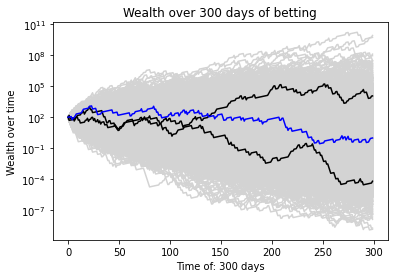

In [11]:
for i in range(wealth_info.shape[0]):
    plt.plot(wealth_info[i, :], color='lightgrey')
plt.title(f'Wealth over {time} days of betting')
plt.xlabel(f'Time of: {time} days')
plt.ylabel('Wealth over time')
plt.plot(final_wealth_95_percentile, color='black')
plt.plot(final_wealth_5_percentile, color='black')
plt.plot(final_wealth_50_percentile, color='blue')
plt.yscale('log')
# plt.savefig('all_in_bet.png')
plt.show()

In [12]:
wealth_info.shape

(5000, 300)

In [13]:
average_daily_return = np.mean(np.log(wealth_info), axis=1)
mu = np.mean(average_daily_return)
top_5_percent = mu + np.std(average_daily_return)*0.95*2
bottom_5_percent = np.mean(average_daily_return) - np.std(average_daily_return)*0.95*2
print(f'Average return: {mu}')
print(f'95 Percentile: {top_5_percent}')
print(f'5 Percentile: {bottom_5_percent}')

Average return: 2.3127399002036917
95 Percentile: 8.5941254740728
5 Percentile: -3.968645673665418


/home/siddesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


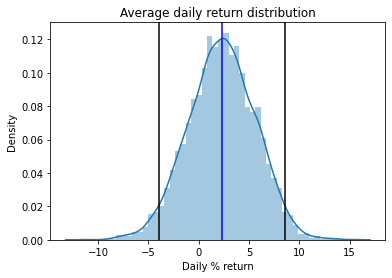

In [14]:
sns.distplot(np.mean(np.log(wealth_info), axis=1), bins=50)
plt.axvline(mu, 0, 1, color='blue')
plt.axvline(bottom_5_percent, 0, 1, color='black')
plt.axvline(top_5_percent, 0, 1, color='black')
plt.title('Average daily return distribution')
plt.xlabel('Daily % return')
# plt.savefig('all_in_bet_dist.png')
plt.show()

distribution of average return. then get the 95 and 5 percentile 
plot with portfolio of safe haven in it. 

In [15]:
# time = 300 # simulates 300 days
# no_iterations = 1000
wealth_info = np.ones((no_iterations, 1))*100 # starting wealth 100
bet_values = list(dice_game.values())
# kelly's criterion: optimal betting strategy. 60% cash, 40% rebet
for i in range(1, time):
    values = np.random.choice(a=bet_values, size=no_iterations)
    cash_allocation = 0.6*wealth_info[:,-1]
    betting_allocation = 0.4*wealth_info[:,-1]
    end_wealth = np.multiply(betting_allocation, values)
    end_wealth += cash_allocation
    end_wealth = end_wealth.reshape((-1,1))
    wealth_info = np.concatenate((wealth_info, end_wealth), axis=1)

In [16]:
ranked_final_wealth = np.argsort(wealth_info[:, -1])

final_wealth_95_percentile = wealth_info[ranked_final_wealth[percentile_95], :]
final_wealth_5_percentile = wealth_info[ranked_final_wealth[percentile_5], :]
final_wealth_50_percentile = wealth_info[ranked_final_wealth[percentile_50], :]

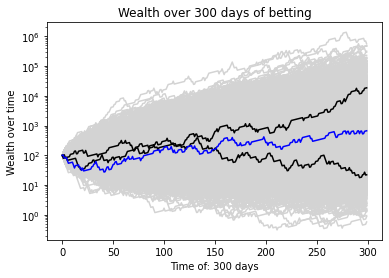

In [17]:
for i in range(wealth_info.shape[0]):
    plt.plot(wealth_info[i, :], color='lightgrey')
plt.title(f'Wealth over {time} days of betting')
plt.xlabel(f'Time of: {time} days')
plt.ylabel('Wealth over time')
plt.plot(final_wealth_95_percentile, color='black')
plt.plot(final_wealth_5_percentile, color='black')
plt.plot(final_wealth_50_percentile, color='blue')
plt.yscale('log')
# plt.savefig('kelly_sim.png')
plt.show()

as we can see here. simply by putting aside 60% of the amount and only betting 40% continously reduced the density of the distribution of the graph. this reduced the risk of us falling into the pit of losing alot of money from the 5 percentile of the distribution

kelly's optimal betting size wont be discussed here as the study focuses on the basis of this new method of risk mititgation. the optimal betting allocation can be determined by (page 81)

In [18]:
average_daily_return = np.mean(np.log(wealth_info), axis=1)
mu = np.mean(average_daily_return)
top_5_percent = mu + np.std(average_daily_return)*0.95*2
bottom_5_percent = np.mean(average_daily_return) - np.std(average_daily_return)*0.95*2
print(f'Average return: {mu}')
print(f'95 Percentile: {top_5_percent}')
print(f'5 Percentile: {bottom_5_percent}')

Average return: 5.562960277413016
95 Percentile: 7.826794609774655
5 Percentile: 3.2991259450513764


/home/siddesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


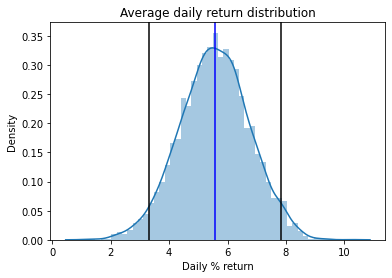

In [19]:
sns.distplot(average_daily_return, bins=50)
plt.axvline(mu, 0, 1, color='blue')
plt.axvline(bottom_5_percent, 0, 1, color='black')
plt.axvline(top_5_percent, 0, 1, color='black')
plt.title('Average daily return distribution')
plt.xlabel('Daily % return')
# plt.savefig('kelly_sim_dist.png')
plt.show()

the left tail of the distribution says that our average tail risk of daily return is 0%. this optimal betting strategy allowed us to mitigate the risk of heavy losses as seen in the previous distribution graph

Now, instead of keeping the money aside, we will allocate a small portion of it to save-haven insurance, which returns a multiple of 1000% when we receive one of the expected probability outcome, which is losing 50% or when our dice game returns a 6

In [20]:
# TODO: plot for portoflio with safe-haven insurance
# distribution

kelly's criterion is still not enough and we can do better here with safe-haven

In [21]:
wealth_info = np.ones((no_iterations, 1))*100 # starting wealth 100
bet_values = np.array(list(dice_game.values()))
# kelly's criterion: optimal betting strategy. 60% cash, 40% rebet

for i in range(1, time):
    values = np.random.choice(a=bet_values, size=no_iterations)
    cash_allocation = 0.58*wealth_info[:,-1]
    betting_allocation = 0.4*wealth_info[:,-1]
    safe_haven_allocation = -0.2*wealth_info[:, -1]
    safe_haven_allocation[values == 0.5] = safe_haven_allocation[values == 0.5]*-100
    end_wealth = np.multiply(betting_allocation, values)
    end_wealth += cash_allocation
    end_wealth += safe_haven_allocation
    end_wealth = end_wealth.reshape((-1,1))
    wealth_info = np.concatenate((wealth_info, end_wealth), axis=1)

In [22]:
wealth_info[ranked_final_wealth[percentile_95]].shape

(300,)

In [23]:
ranked_final_wealth = np.argsort(wealth_info[:, -1])

final_wealth_95_percentile = wealth_info[ranked_final_wealth[percentile_95], :]
final_wealth_5_percentile = wealth_info[ranked_final_wealth[percentile_5], :]
final_wealth_50_percentile = wealth_info[ranked_final_wealth[percentile_50], :]

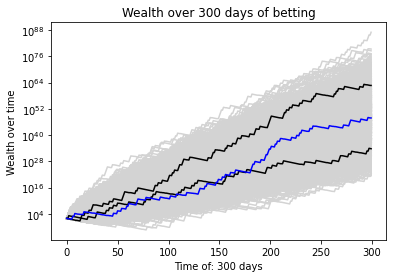

In [24]:
for i in range(wealth_info.shape[0]):
    plt.plot(wealth_info[i, :], color='lightgrey')
plt.title(f'Wealth over {time} days of betting')
plt.xlabel(f'Time of: {time} days')
plt.ylabel('Wealth over time')
plt.plot(final_wealth_95_percentile, color='black')
plt.plot(final_wealth_5_percentile, color='black')
plt.plot(final_wealth_50_percentile, color='blue')
plt.yscale('log')
# plt.savefig('safe-haven.png')
plt.show()

In [25]:
average_daily_return = np.mean(np.log(wealth_info), axis=1)
mu = np.mean(average_daily_return)
top_5_percent = mu + np.std(average_daily_return)*0.95*2
bottom_5_percent = np.mean(average_daily_return) - np.std(average_daily_return)*0.95*2
print(f'Average return: {mu}')
print(f'95 Percentile: {top_5_percent}')
print(f'5 Percentile: {bottom_5_percent}')

Average return: 57.5703404247392
95 Percentile: 79.90038201475323
5 Percentile: 35.240298834725166


/home/siddesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


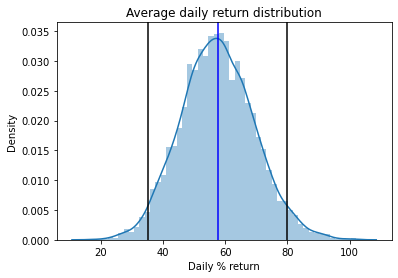

In [26]:
sns.distplot(average_daily_return, bins=50)
plt.axvline(bottom_5_percent, 0, 1, color='black')
plt.axvline(mu, 0, 1, color='blue')
plt.axvline(top_5_percent, 0, 1, color='black')
plt.title('Average daily return distribution')
plt.xlabel('Daily % return')
# plt.savefig('safe-haven_dist.png')
plt.show()

Conclusion: We are able to mitigate risk mathematically and cost-effectively by allocating a small amount of our portfolio to a safe-haven asset that returns 0% during 5/6 of the scenario, but for the one bad scenario, the 2% allocation returns 2000% which causes our overall portfolio to be up by a factor of 4.78. This means that our total portfolio is up by 478 % in time of downturn. That is the untaped potential of safe-haven investing and why it is more effective than diversification. For diversification, in order for it to work, we need a large infusion of capital to spread the risk across different asset class but that also means that we reduce its upward potential in a bull market. 